In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

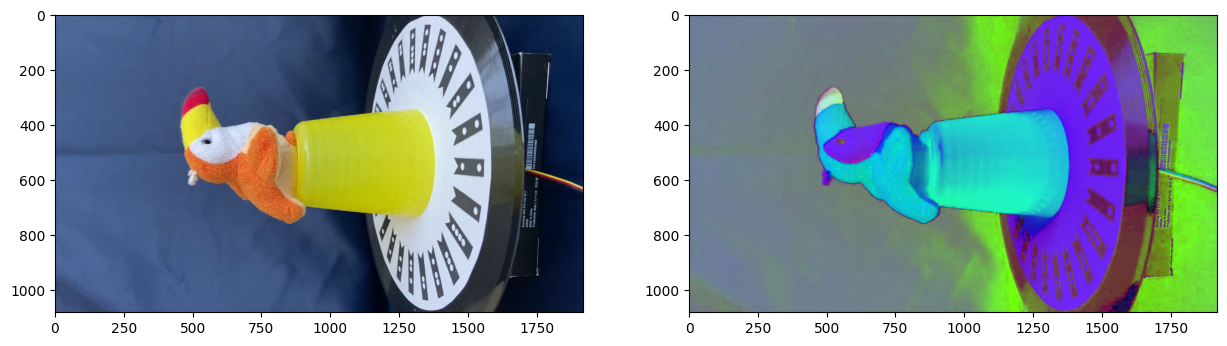

In [21]:
image = cv.imread("./assignment1_test_dataset/obj01/000000.png", ).astype(np.uint8)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2HSV))